In [14]:
import tensorflow as tf


In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=40,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               shear_range=0.2,
                                                               zoom_range=0.2,
                                                               horizontal_flip=True,
                                                               fill_mode='nearest')

In [16]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [17]:
import os

training_set = test_datagen.flow_from_directory(os.path.join("img-data", 'train'),
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode= 'categorical')

Found 1289 images belonging to 10 classes.


In [18]:
test_set = test_datagen.flow_from_directory(os.path.join("img-data", "test"),
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 50 images belonging to 10 classes.


In [20]:
from keras import layers, models, optimizers
from keras import callbacks

model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    # First Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    #Second Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    #Third Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    #Fourth Block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),

    #Fully Connected
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

#compile the model 
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Training
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 351ms/step - accuracy: 0.2430 - loss: 17.2573 - val_accuracy: 0.1000 - val_loss: 14.7865 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.5428 - loss: 11.9731 - val_accuracy: 0.1000 - val_loss: 14.2129 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 329ms/step - accuracy: 0.6354 - loss: 9.8992 - val_accuracy: 0.1000 - val_loss: 14.2298 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.7234 - loss: 8.1145 - val_accuracy: 0.1000 - val_loss: 13.8847 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.7335 - loss: 6.7666 - val_accuracy: 0.1200 - val_loss: 11.1565 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.8058 - loss: 5.6570 - val_accuracy: 0.2400 - val_loss: 9.1284 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 327ms/step - accuracy: 0.7918 - l

In [21]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
os.makedirs(save_dir, exist_ok=True)
model_file = os.path.join(save_dir, 'cnn_model.h5')

model.save(model_file)

In [23]:
from keras import models

my_model = models.load_model(os.path.join('saved_models', 'cnn_model.h5'))

In [25]:
import matplotlib.pyplot as plt
from keras import preprocessing
import numpy as np

img1 = preprocessing.image.load_img('img-data\\train\\air hockey\\001.jpg', target_size=(64,64))
img = preprocessing.image.img_to_array(img1)
img = img/255


In [26]:
img = np.expand_dims(img, axis=0)
pred = my_model.predict(img, batch_size=None, steps=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


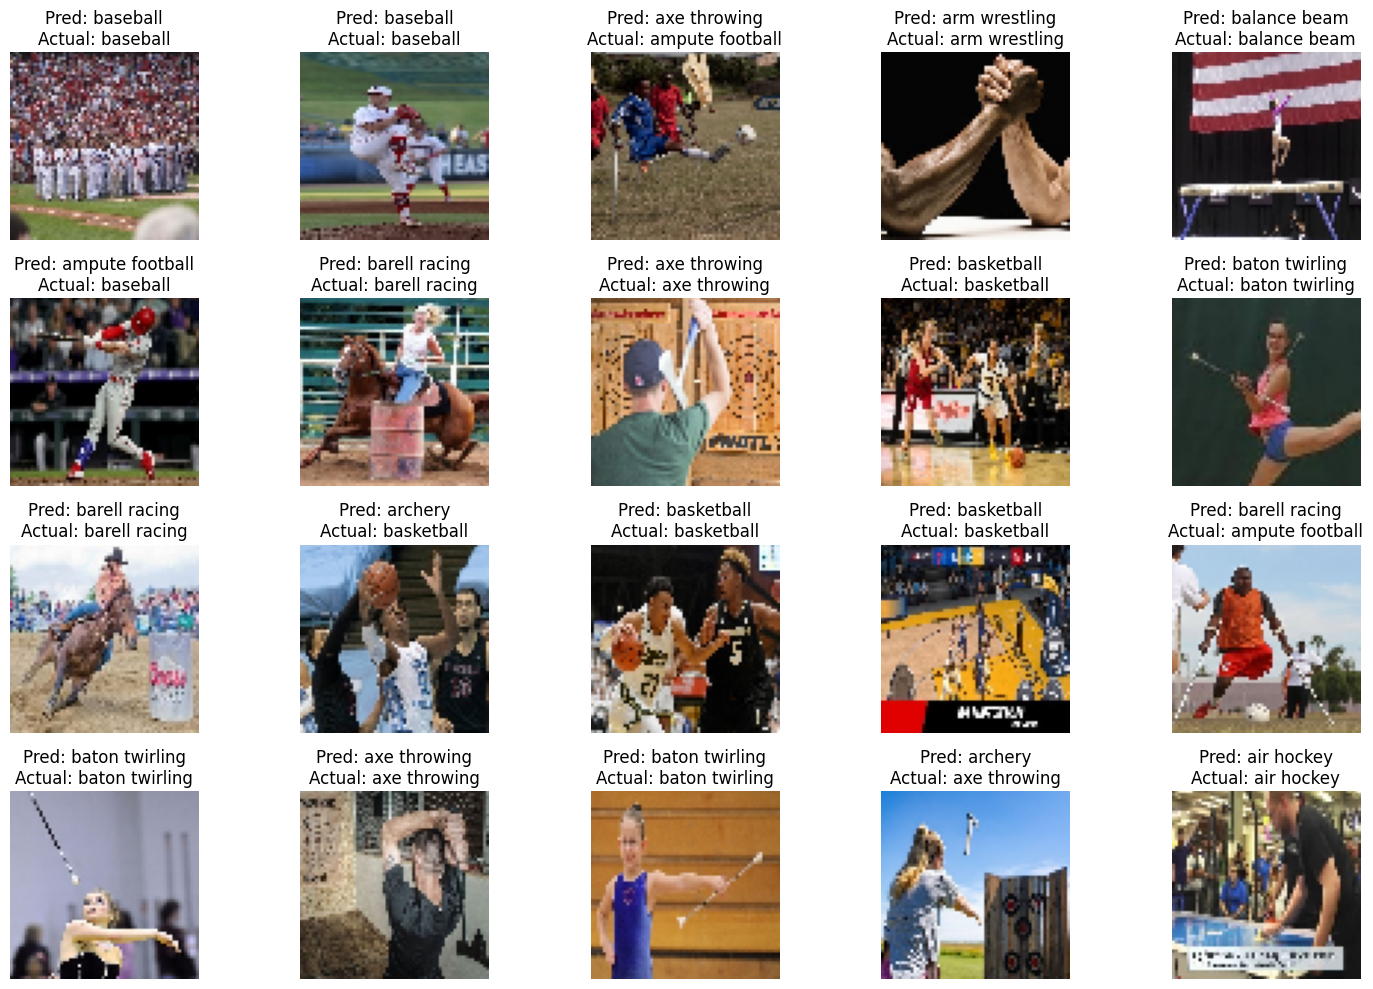

In [36]:
images, labels = next(test_set)
prediction = my_model.predict(images)

class_indices = test_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    predicted_class = class_labels[np.argmax(prediction[i])]
    actual_class = class_labels[np.argmax(labels[i])]
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}")
    plt.axis('off')
plt.tight_layout()
plt.show()